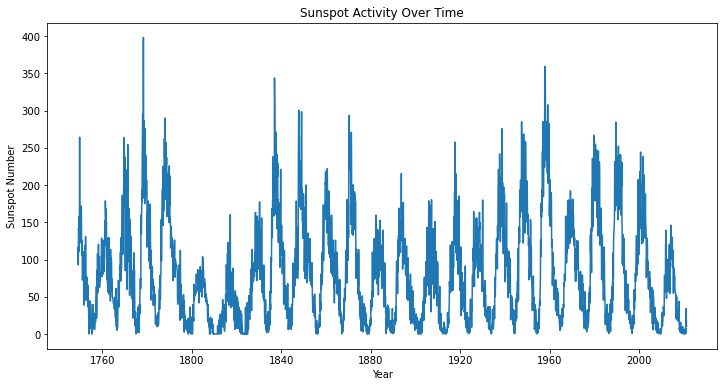

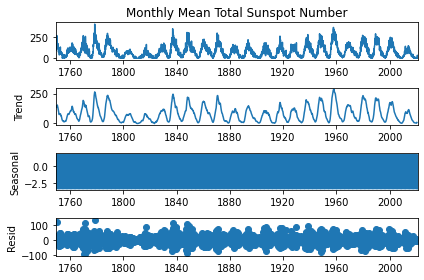

C:\Users\chgay\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


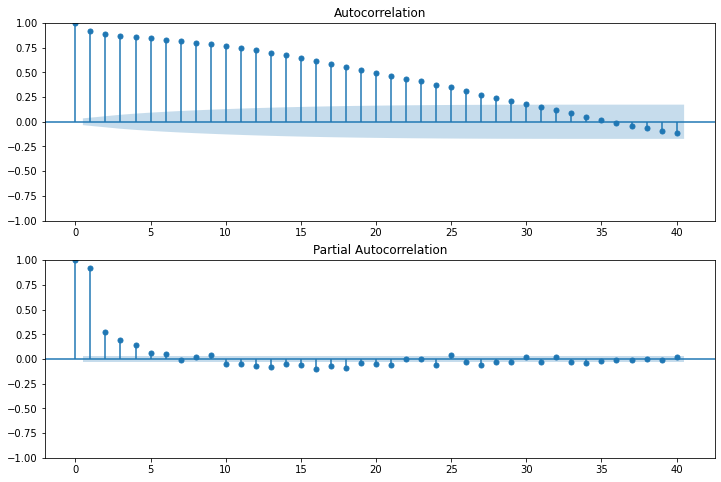

C:\Users\chgay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\chgay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                       SARIMAX Results                                       
Dep. Variable:     Monthly Mean Total Sunspot Number   No. Observations:                 3265
Model:                SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -15137.410
Date:                               Sun, 15 Oct 2023   AIC                          30284.820
Time:                                       22:43:28   BIC                          30315.255
Sample:                                   01-31-1749   HQIC                         30295.722
                                        - 01-31-2021                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2271      0.026      8.763      0.000       0.176       0.278
ma.L1      

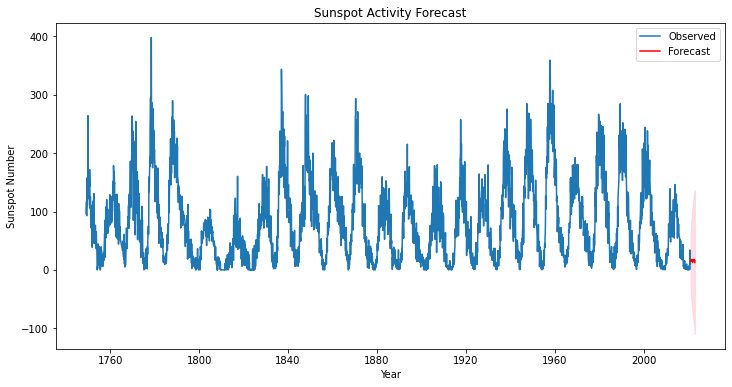

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

data = pd.read_csv("sunspots.csv")
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data.set_index('Date', inplace=True)
sunspot_series = data['Monthly Mean Total Sunspot Number']

plt.figure(figsize=(12, 6))
plt.plot(sunspot_series)
plt.title('Sunspot Activity Over Time')
plt.xlabel('Year')
plt.ylabel('Sunspot Number')
plt.show()

result = seasonal_decompose(sunspot_series, model='additive')
result.plot()
plt.show()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(sunspot_series, ax=ax1, lags=40)
plot_pacf(sunspot_series, ax=ax2, lags=40)
plt.show()

p = 1
d = 1
q = 1
P = 1
D = 1
Q = 1 
s = 12

sarima_model = SARIMAX(sunspot_series, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_results = sarima_model.fit()

print(sarima_results.summary())

forecast_steps = 24
forecast = sarima_results.get_forecast(steps=forecast_steps)

forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

plt.figure(figsize=(12, 6))
plt.plot(sunspot_series, label='Observed')
plt.plot(forecast_values.index, forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_conf_int.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.5)
plt.title('Sunspot Activity Forecast')
plt.xlabel('Year')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()
